# 1)Fraud data 

In [62]:
from pandas import read_csv
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
fraud=read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [7]:
label_encoder = preprocessing.LabelEncoder()
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status']) 
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,2,68833,50047,10,YES
1,YES,0,33700,134075,18,YES
2,NO,1,36925,160205,30,YES
3,YES,2,50190,193264,15,YES
4,NO,1,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,0,76340,39492,7,YES
596,YES,0,69967,55369,2,YES
597,NO,0,47334,154058,0,YES
598,YES,1,98592,180083,17,NO


In [63]:
fraud.insert(6,'tax_class'," ")

for i in range(0,len(fraud['Taxable.Income']),1):
    if fraud['Taxable.Income'].iloc[i]<=30000:
        fraud['tax_class'].iloc[i]='Risky'
    else:
        fraud['tax_class'].iloc[i]='Good' 

ValueError: cannot insert tax_class, already exists

In [9]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,2,68833,50047,10,YES,Good
1,YES,0,33700,134075,18,YES,Good
2,NO,1,36925,160205,30,YES,Good
3,YES,2,50190,193264,15,YES,Good
4,NO,1,81002,27533,28,NO,Good


In [10]:
fraud.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [11]:
fraud.drop(['Taxable.Income'],axis=1,inplace=True)
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,2,50047,10,YES,Good
1,YES,0,134075,18,YES,Good
2,NO,1,160205,30,YES,Good
3,YES,2,193264,15,YES,Good
4,NO,1,27533,28,NO,Good


In [12]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])
fraud['tax_class']= label_encoder.fit_transform(fraud['tax_class'])


In [13]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [14]:
fraud.iloc[:,2:4]=StandardScaler().fit_transform(fraud.iloc[:,2:4])
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


<AxesSubplot:>

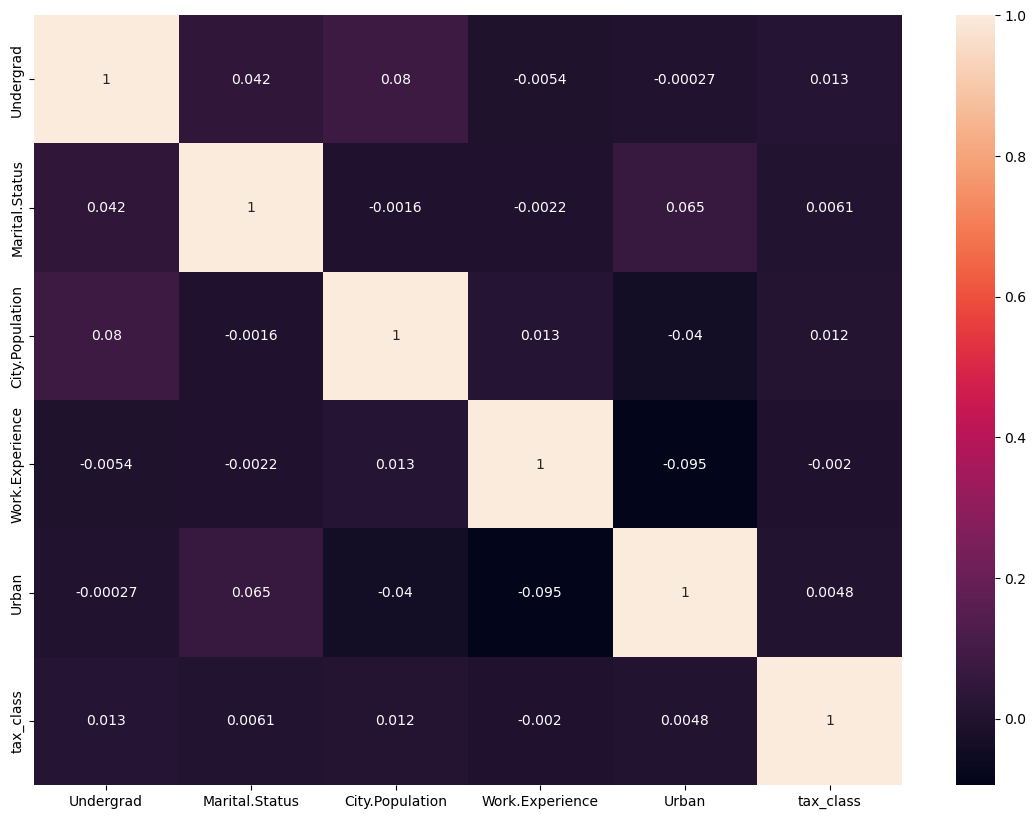

In [15]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(fraud.corr(),annot=True)

In [16]:
X=fraud.iloc[:,0:-1]
Y=fraud['tax_class']

# Random forest

In [17]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10) #Bootstrap

In [18]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7433333333333334


# Bagging Classifier

In [19]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 


kfold = KFold(n_splits=10) # evaluation method
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees) #Classifier
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7333333333333333


# AdaBoost Classifier

In [51]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 15
seed=42
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.625


# XGBoost

In [52]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [53]:
X=fraud.iloc[:,0:-1]
y=fraud['tax_class']

In [54]:
# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [55]:
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [56]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [57]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.24%


# LGBM

In [58]:
!pip install lightgbm
from lightgbm import LGBMClassifier

In [59]:
clf=LGBMClassifier(learning_rate=0.001,num_leaves=10,max_depth=3,n_estimators=500)
clf.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.001, max_depth=3, n_estimators=500,
               num_leaves=10)

In [60]:
y_pred=clf.predict(X_test)

In [61]:
prediction=[round(value) for value in y_pred]
accuracy=accuracy_score(y_test,prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.29%


# 2)Company data 

In [31]:
from pandas import read_csv
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import numpy as np
import pandas as pd

In [32]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [33]:
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [34]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 

In [35]:
df['Urban'] = np.where(df['Urban'].str.contains("Yes"), 1, 0)
df['US'] = np.where(df['US'].str.contains("Yes"), 1, 0)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [36]:
X=df.iloc[:,0:6]
Y=df['ShelveLoc']

# Random forest

In [37]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10) #Bootstrap

In [38]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.645


# Bagging Classifier

In [39]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 


kfold = KFold(n_splits=10) # evaluation method
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees) #Classifier
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6375


# AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 15
seed=0
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.625


# XGBoost

In [41]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
X=df.iloc[:,0:6]
Y=df['ShelveLoc']

In [43]:
# split data into train and test sets
seed = 0
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [44]:
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [45]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [46]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.88%


# LGBM

In [47]:
!pip install lightgbm
from lightgbm import LGBMClassifier

In [48]:
clf=LGBMClassifier(learning_rate=0.001,num_leaves=10,max_depth=3,n_estimators=500)
clf.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.001, max_depth=3, n_estimators=500,
               num_leaves=10)

In [49]:
y_pred=clf.predict(X_test)

In [50]:
prediction=[round(value) for value in y_pred]
accuracy=accuracy_score(y_test,prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.06%
